In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.tabular import *
from fastai import *

## Looking at sample data

In [3]:
path = Path('/mnt/datadrive1/h216520/fastai_v3/data/PUBG'); path

PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/PUBG')

In [4]:
# pubsamp = pd.read_csv('/mnt/datadrive1/h216520/fastai_v3/data/PUBG/train_V2.csv')
# pubsamp_test = pd.read_csv('/mnt/datadrive1/h216520/fastai_v3/data/PUBG/test_V2.csv')
train_raw = pd.read_csv('/mnt/datadrive1/h216520/fastai_v3/data/PUBG/train_V2.csv', nrows=10000)
test_raw = pd.read_csv('/mnt/datadrive1/h216520/fastai_v3/data/PUBG/test_V2.csv', nrows=10000)

# pubsamp.to_feather(f'{path}/train_V2')
# pubsamp_test.to_feather(f'{path}/test_V2')

In [10]:
# !pip install pyarrow==0.09
# !pip install pandas==0.23.0

    100% |████████████████████████████████| 11.7MB 6.2MB/s eta 0:00:01
tensorflow 1.11.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.4.3 which is incompatible.
spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2018.8.29 which is incompatible.
kaggle 1.5.0 has requirement urllib3<1.23.0,>=1.15, but you'll have urllib3 1.23 which is incompatible.
  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [133]:
# import feather
train_raw = pd.read_feather(f'{path}/train_V2')
test_raw = pd.read_feather(f'{path}/test_V2')
# pubsamp = feather.read_dataframe(f'{path}/train_V2')
# pubsamp_test = feather.read_dataframe(f'{path}/test_V2')

In [5]:
train_raw[train_raw.winPlacePerc.isna(), 'winPlacePerc'] = train_raw.winPlacePerc.median()

In [6]:
train_raw[train_raw.winPlacePerc.isna()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [7]:
train_raw.shape;train_raw.columns;train_raw.dtypes

(10000, 29)

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

Id                  object
groupId             object
matchId             object
assists            float64
boosts             float64
damageDealt        float64
DBNOs              float64
headshotKills      float64
heals              float64
killPlace          float64
killPoints         float64
kills              float64
killStreaks        float64
longestKill        float64
matchDuration      float64
matchType           object
maxPlace           float64
numGroups          float64
rankPoints         float64
revives            float64
rideDistance       float64
roadKills          float64
swimDistance       float64
teamKills          float64
vehicleDestroys    float64
walkDistance       float64
weaponsAcquired    float64
winPoints          float64
winPlacePerc       float64
dtype: object

In [8]:
train_raw.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [9]:
train_raw.shape
train_raw.columns

(10000, 29)

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [42]:
train_raw.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


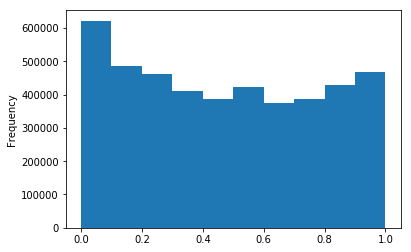

In [54]:
train_raw.winPlacePerc.plot.hist()

In [57]:
(train_raw.winPlacePerc == 1).sum()/train_raw.shape[0]*100

2.86876490623045

In [33]:
summ = pd.DataFrame({'Variable':train_raw.columns.values,
                   'dtype':train_raw.dtypes.values,
                   'n_missing':[train_raw[col].shape[0]-train_raw[col].dropna().shape[0] for col in train_raw.columns],
                   'perc_missing':[(train_raw[col].shape[0]-train_raw[col].dropna().shape[0])*100/train_raw[col].shape[0] for col in train_raw.columns],
                   'unique_cnt' : [len(train_raw[col].unique()) for col in train_raw.columns],
                   'unique_values': [(train_raw[col].unique()) if (len(train_raw[col].unique())<10) else 'UniqueVals>10' for col in train_raw.columns],
                    'sample_values':[(train_raw[col].unique()[:10]) for col in train_raw.columns]},
                           index=np.arange(train_raw.shape[1]))

In [38]:
summ.to_csv(f'{path}/train_summary.csv')

In [7]:
# Check if match id are different in train and test sets; same for groupids
len(set(train_raw.Id) & set(test_raw.Id))
len(set(train_raw.groupId) & set(test_raw.groupId))
len(set(train_raw.matchId) & set(test_raw.matchId))
# --> So totally different matches and groups!!??

0

0

0

## Model Pre Steps

### Iter1 with less categorical variables

In [8]:
from sklearn.ensemble import RandomForestRegressor
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split

In [9]:
dep_var = 'winPlacePerc'
cont_names = ['assists', 'boosts', 'damageDealt', 'DBNOs','headshotKills', 'heals',  'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration',  'numGroups', 'rankPoints', 'revives', 
    'rideDistance', 'roadKills','swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance','weaponsAcquired', 'winPoints']
cat_names = ['killPlace', 'matchType', 'maxPlace']
procs = [FillMissing, Categorify, Normalize]

In [10]:
ignored_fds = ['Id', 'groupId', 'matchId']
train_raw.drop(labels=ignored_fds, axis=1, inplace=True)
test_raw.drop(labels=ignored_fds, axis=1, inplace=True)

In [11]:
categorify = ['matchType']
train = pd.get_dummies(train_raw)
test = pd.get_dummies(test_raw)

X_train, X_valid, y_train, y_valid = train_test_split(train.drop(['winPlacePerc'], axis=1), train['winPlacePerc'])

In [12]:
m = RandomForestRegressor(oob_score=True, n_estimators=100, n_jobs=7)

In [16]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def mae(x,y): return np.abs(x - y).mean()

def print_rmse(m):
    res = {'train_rmse':rmse(m.predict(X_train), y_train), 'val_rmse':rmse(m.predict(X_valid), y_valid),
                'train_r2':m.score(X_train, y_train), 'val_r2':m.score(X_valid, y_valid)}
    if hasattr(m, 'oob_score_'): res.update({'oob_rmse' : m.oob_score_})
    print(res)

def print_mae(m):
    res = {'train_mae':mae(m.predict(X_train), y_train), 'val_mae':mae(m.predict(X_valid), y_valid),
                'train_r2':m.score(X_train, y_train), 'val_r2':m.score(X_valid, y_valid)}
    if hasattr(m, 'oob_score_'): res.update({'oob_rmse' : m.oob_score_})
    print(res)

In [14]:
%time
m.fit(X_train, y_train)

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 4.53 µs


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=7,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [17]:
print_mae(m)

{'train_mae': 0.02150949769487258, 'val_mae': 0.0578649523293715, 'train_r2': 0.9900766054466519, 'val_r2': 0.9297468072885761, 'oob_rmse': 0.9280944617016267}


In [73]:
rfimp = pd.DataFrame({'cols':X_train.columns.values,'imp':m.feature_importances_})

rfimp.sort_values(by='imp', ascending=False)

In [131]:
testcols = list(train.columns.values)
testcols.remove('winPlacePerc')
test_preds = m.predict(test[testcols])

In [137]:
subm = pd.DataFrame({'Id':test_raw.Id, 'preds':test_preds})

subm.to_csv(path/'submission.csv', index=False)